<a href="https://colab.research.google.com/github/Elay-math/graph_teory/blob/main/AlgoritmosGrafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Elías Custodio Wong

Iniciando en el nodo: A
 Árbol mínimo generador con Prim:
A-S (peso: 14)
S-D (peso: 12)
S-C (peso: 13)
S-B (peso: 16)
D-H (peso: 75)
H-G (peso: 23)
G-F (peso: 22)
F-E (peso: 24)
E-I (peso: 81)
I-J (peso: 12)
G-K (peso: 83)
K-L (peso: 16)
Peso del grafo: 391


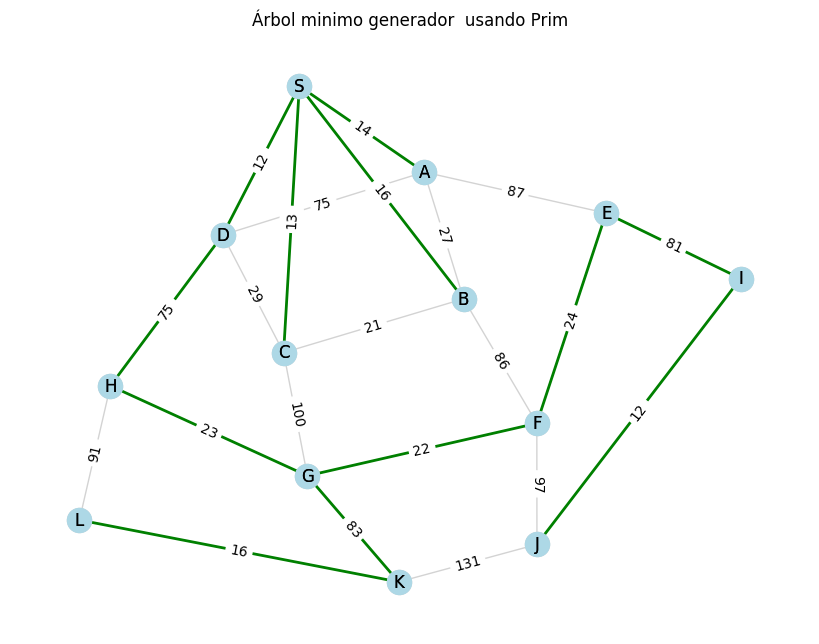

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

def prim_mst(graph, start_node=None):
  #se elije un vertice inicial
    if start_node is None:
        start_node = list(graph.nodes)[0]  # toma el primero si no se da uno
  #será el conjuto de vertices que ya se visitaron
    visited = set()
    #lista de aristas del arbol generador
    mst_edges = []
    #es una cola de prioridad para elegir las aristas de menor peso
    min_heap = []

    visited.add(start_node)
    print(f"Iniciando en el nodo: {start_node}")

    # Añadir todas las aristas del nodo inicial al heap
    for neighbor, data in graph[start_node].items():
        heapq.heappush(min_heap, (data['weight'], start_node, neighbor))
        #para cada vecino del vertice incial se añade una tupla al heap con forma (peso, desde, hacia), de esta forma el heap siempre tiene la arista con menor peso en la cima
    #mientras todavia se tengan que visitar aristas
    while min_heap and len(visited) < len(graph.nodes):
      #saca la arista de menor peso disponible del vertice u al v
        weight, u, v = heapq.heappop(min_heap)
        #se añade v a los vertices visitados
        if v not in visited:
            visited.add(v)
            #se añade a las aristas del arbol
            mst_edges.append((u, v, weight))

            for neighbor, data in graph[v].items():
              #de v agregamos al heap todas las aristas que nos llevan a vertices que no se han visitado, si v ya fue visitado entonces se formaría un ciclo, por lo tanto se ignora a v
                if neighbor not in visited:
                    heapq.heappush(min_heap, (data['weight'], v, neighbor))

    return mst_edges

# Crear grafo de ejemplo
G = nx.Graph()
G.add_weighted_edges_from([
    ('A', 'B', 27),
    ('A', 'S', 14),
    ('A', 'D', 75),
    ('A', 'E', 87),
    ('B', 'S', 16),
    ('B', 'C', 21),
    ('B', 'F', 86),
    ('C', 'S', 13),
    ('C', 'D', 29),
    ('C', 'G', 100),
    ('D', 'S', 12),
    ('D', 'H', 75),
    ('E', 'F', 24),
    ('F', 'G', 22),
    ('F', 'J', 97),
    ('G', 'H', 23),
    ('G', 'K', 83),
    ('H', 'L', 91),
    ('I', 'E', 81),
    ('I', 'J', 12),
    ('J', 'K', 131),
    ('K', 'L', 16)
])

# Ejecutar Prim
mst_prim = prim_mst(G)

#  resultado final
print(" Árbol mínimo generador con Prim:")
for u, v, w in mst_prim:
    print(f"{u}-{v} (peso: {w})")
#Peso del grafo
i=0
for edge in mst_prim:
    i+=edge[2]
print("Peso del grafo:",i)
# Grafica
MST = nx.Graph()
MST.add_weighted_edges_from(mst_prim)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightgrey', edge_color='lightgrey')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

nx.draw(MST, pos, with_labels=True, node_color='lightblue', edge_color='green', width=2)
nx.draw_networkx_edge_labels(MST, pos, edge_labels={(u, v): w for u, v, w in mst_prim})

plt.title("Árbol minimo generador  usando Prim")
plt.show()


De este programa concluimos que la cantidad mínima de cableado que se necesita para conectar el taller son 391 mts de cable

Aristas del Árbol generador ordenadas:
S - D (peso: 12)
J - I (peso: 12)
S - C (peso: 13)
A - S (peso: 14)
B - S (peso: 16)
K - L (peso: 16)
F - G (peso: 22)
G - H (peso: 23)
E - F (peso: 24)
D - H (peso: 75)
E - I (peso: 81)
G - K (peso: 83)
Peso del grafo: 391


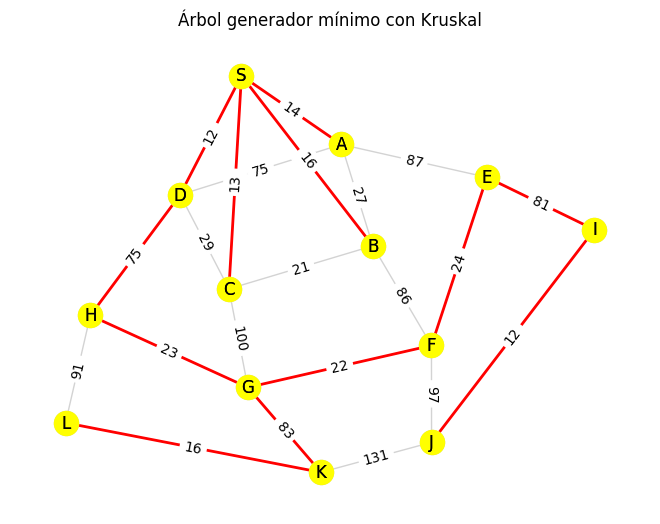

In [25]:

# Clase para representar el algoritmo de Kruskal
class Pointer:
  #nodes es una lista con todos los vertices del grafo
    def __init__(self, nodes):
      #se crea un diccionario self.parent donde se guardan los vertices y el vertice al que apuntan, la principio todos los vertices se apuntan a ellos mismos
        self.parent = {node: node for node in nodes}
    #esta función se define para buscar al representante de cada clase de vertices, es decir la raiz
    def find(self, node):
      #si el vertice no es su raiz entonces se busca a la raiz, esto lo usaremos más adelante en la siguiente función, pues cada que se añade una arista se consigue una raíz de tal forma que los vertices que apuntan a la misma raiz se queda en una misma lista
        if self.parent[node] != node:
            self.parent[node] = self.find(self.parent[node])  # se aplica la tecnica de path compression para que eventualmente todos los vertices apunten a la misma raíz
        return self.parent[node]

    def union(self, u, v):
      #se buscan las raices de los vertices u y v
        root_u = self.find(u)
        root_v = self.find(v)
        #si los vertices tienen diferentes raices significa que estan en diferentes listas y se pueden unir pues no se formaría un ciclo
        if root_u != root_v:
          #se hace que los dos vertices apunten a la misma raíz
            self.parent[root_v] = root_u
            return True
        return False
#esta funcion va a devolver una lista de tuplas de la siguiente forma (u,v,peso)
def kruskal_tree(graph):
  #se ordenan las tuplas de menor a mayor peso, donde data es el diccionario con los pesos, key=lambda es una funcion anónima y lo que hace con x:x[2][weight] es acceder al peso que es el valor númerico de cada tupla
    edges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'])
    #se inicializa la funcion pointer
    uf = Pointer(graph.nodes)
    #en esta lista se guardaran los datos del arbol generador mínimo
    tree_edges = []

    #se recorren las aristas de menor a mayor peso, con union se verifica si no forman ciclos, si no se forman entonces se añaden a la lista de aristas del arbol generador minimo
    for u, v, data in edges:
        if uf.union(u, v):
            tree_edges.append((u, v, data['weight']))
    return tree_edges

# Se crea el grafo
G = nx.Graph()
#Aquí se añaden las aristas y pesos del grafo original
G.add_weighted_edges_from([
    ('A', 'B', 27),
    ('A', 'S', 14),
    ('A', 'D', 75),
    ('A', 'E', 87),
    ('B', 'S', 16),
    ('B', 'C', 21),
    ('B', 'F', 86),
    ('C', 'S', 13),
    ('C', 'D', 29),
    ('C', 'G', 100),
    ('D', 'S', 12),
    ('D', 'H', 75),
    ('E', 'F', 24),
    ('F', 'G', 22),
    ('F', 'J', 97),
    ('G', 'H', 23),
    ('G', 'K', 83),
    ('H', 'L', 91),
    ('I', 'E', 81),
    ('I', 'J', 12),
    ('J', 'K', 131),
    ('K', 'L', 16)
])

# Se ejecuta el algoritmo
mst = kruskal_tree(G)

# Mostrar aristas seleccionadas
print("Aristas del Árbol generador ordenadas:")
for edge in mst:
    print(f"{edge[0]} - {edge[1]} (peso: {edge[2]})")
#Peso del grafo
i=0
for edge in mst:
    i+=edge[2]
print("Peso del grafo:",i)

#  grafo de arbol
tree = nx.Graph()
tree.add_weighted_edges_from(mst)

#  grafo original en gris
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightgrey', edge_color='lightgrey')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

# arbol en color superpuesto
nx.draw(tree, pos, with_labels=True, node_color='yellow', edge_color='red', width=2)
nx.draw_networkx_edge_labels(tree, pos, edge_labels={(u, v): w for u, v, w in mst})

plt.title("Árbol generador mínimo con Kruskal")
plt.show()


De este programa concluimos que la arista septima es F-G y la octava es G-H